# Visualizing SERPENT Flux with EXFOR Data

In this simple example, we show how to grab data from EXFOR, import SERPENT output files, and plot both along with the evaluation to visualize areas of interest. In particular, we look at the chlorine 35 experimental datapoints and the MCFR flux. 

In [1]:
## Prototype
# import sys
# # This allows us to import the nucml utilities
# sys.path.append("../")

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

import nucml.exfor.data_utilities as exfor_utils
import nucml.evaluation.data_utilities as eval_utils
import nucml.datasets as nuc_data

In [3]:
sns.set(font_scale=2)
sns.set_style('white')

In [4]:
figure_dir = "Figures/"

## Loading EXFOR and Chlorine Data

First, let us load the EXFOR database, extract the chlorine subset, load the ENDF information, and the new Chlorine measurments.

In [5]:
df = nuc_data.load_exfor()
df.MT = df.MT.astype(int) # we need to conver to int (bug)

INFO:root: MODE: neutrons
INFO:root: LOW ENERGY: False
INFO:root: LOG: False
INFO:root: BASIC: -1
INFO:root:Reading data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/EXFOR/CSV_Files\EXFOR_neutrons/EXFOR_neutrons_MF3_AME_no_RawNaN.csv
INFO:root:Data read into dataframe with shape: (4255409, 104)
INFO:root:Finished. Resulting dataset has shape (4255409, 104)


In [12]:
chlorine_35 = exfor_utils.load_samples(df, 17, 35, 103)

INFO:root:Extracting samples from dataframe.
INFO:root:EXFOR extracted DataFrame has shape: (215, 104)


In [17]:
# Loading LBNL new chlorine measurments
new_data = eval_utils.load_new("../EXFOR/New_Data/cl35_np.csv")

INFO:root:Finish reading ENDF data with shape: (12, 4)


In [18]:
# load_endf() extracts ENDF data from ML_Data directory
endf_cl = nuc_data.load_evaluation("Cl035", "103", mev_to_ev=True, mb_to_b=True, drop_u=True, log=False)

INFO:root:EVALUATION: Extracting data from C:/Users/Pedro/Desktop/ML_Nuclear_Data/Evaluated_Data\neutrons/Cl035/endfb8.0/tables/xs/n-Cl035-MT103.endfb8.0
INFO:root:EVALUATION: Converting MeV to eV...
INFO:root:EVALUATION: Converting mb to b...
INFO:root:EVALUATION: Finished. ENDF data contains 8791 datapoints.


## Reading SERPENT Flux

Remember that the appropiate detectors need to be defined in the SERPENT input. If defined correctly, the flux information will be available in the `*_detector.mat` file.

In [21]:
from scipy.io import loadmat

In [15]:
x = loadmat('SERPENT/MCFR_detector.mat')

C:\Users\Pedro\Anaconda3\envs\nucml\lib\site-packages\scipy\io\matlab\mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


## Plotting Flux, EXFOR, and Imported Data

Having all our data loaded, we can simply use `matplotlib` to generate a figure containing all necessary information. 

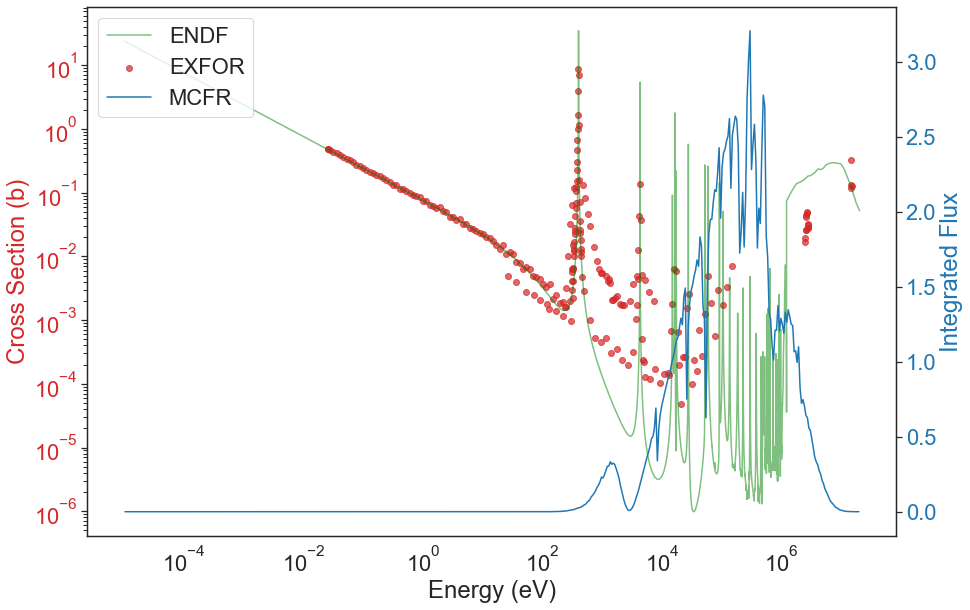

In [20]:
# Create some mock data
fig, ax1 = plt.subplots(figsize=(14,9))

color = 'tab:red'
ax1.set_xlabel('Energy (eV)')
ax1.set_ylabel('Cross Section (b)', color=color)
ax1.scatter(chlorine_35.Energy, chlorine_35.Data, color=color, alpha=0.7, label="EXFOR")
ax1.scatter(new_data.Energy, new_data.Data, color=color, alpha=0.7) #, label="J.C.Batchelder, et. al. 2019")
ax1.plot(endf_cl.Energy, endf_cl.Data, color='green', alpha=0.5, label="ENDF")
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')
ax1.set_xscale('log')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Integrated Flux', color=color)  # we already handled the x-label with ax1
ax2.plot(x["DETEnergyDetectorE"][:,2]*1E6, x["DETEnergyDetector"][:,10], color=color, label="MCFR")
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_yscale('log')
ax2.set_xscale('log')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(os.path.join(figure_dir, "MCFR_EXFOR_Flux.png"), bbox_inches='tight', dpi=300)
plt.show()